In [1]:
import pandas as pd
import matplotlib.pyplot as plt
figsize = (12, 6)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
# load the metrics
vit_ensemble = pd.read_csv("vit_ensemble_metrics_stack.csv")
conv_ensemble = pd.read_csv("conv_ensemble_metrics_stack.csv")
vit_base_16 = pd.read_csv("vit_base_16_metrics_stack.csv")
convnext = pd.read_csv("convnext_metrics_stack.csv")

In [2]:
vit_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
vit_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,32.000000,32.000000
mean,0.807924,0.787888
std,0.001816,0.001955
min,0.805419,0.784703
25%,0.806428,0.786228
50%,0.807870,0.787939
75%,0.809167,0.789233
max,0.811185,0.791813


In [3]:
conv_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
conv_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,32.000000,32.000000
mean,0.816671,0.780537
std,0.002495,0.002615
min,0.810897,0.774040
25%,0.814860,0.779081
50%,0.817383,0.780835
75%,0.818175,0.782143
max,0.822427,0.786583


In [4]:
convnext.describe()

,test/loss,test/Accuracy,test/BalancedAccuracy
count,32.000000,32.000000,32.000000
mean,1.600657,0.746523,0.712922
std,0.002418,0.002373,0.002289
min,1.596016,0.741712,0.708192
25%,1.599158,0.744811,0.710728
50%,1.600687,0.746901,0.712873
75%,1.601878,0.747910,0.714335
max,1.605427,0.750937,0.717398


In [5]:
vit_base_16.describe()

,test/loss,test/Accuracy,test/BalancedAccuracy
count,32.000000,32.000000,32.000000
mean,1.310268,0.761387,0.739169
std,0.002555,0.002239,0.002463
min,1.306384,0.756990,0.734706
25%,1.308321,0.759801,0.737227
50%,1.310427,0.761603,0.739466
75%,1.312396,0.762756,0.741113
max,1.315910,0.766503,0.744791


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

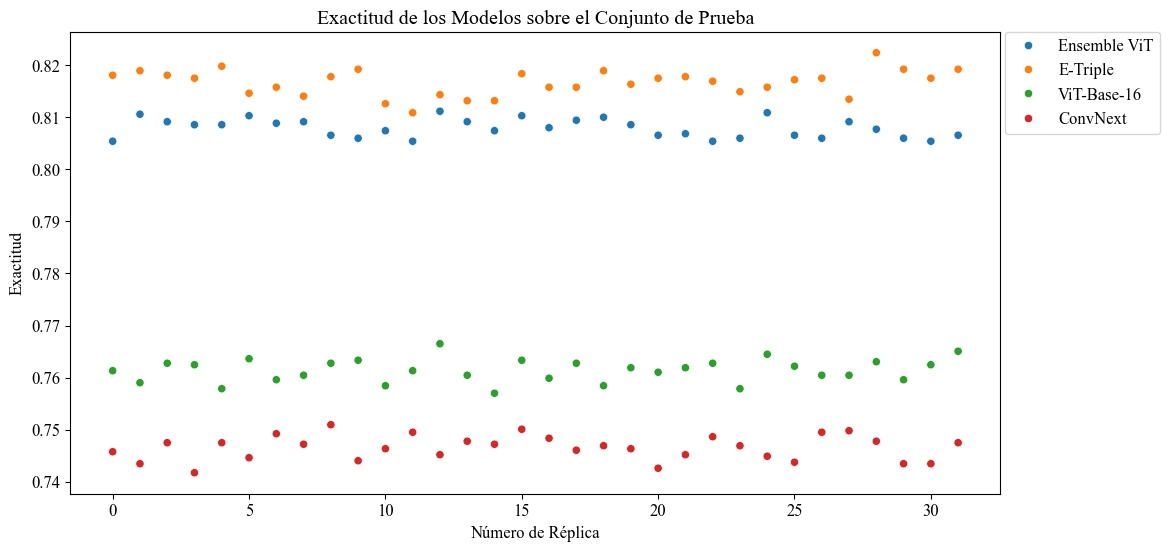

In [7]:
all_metrics = pd.concat(
    [
        vit_ensemble,
        conv_ensemble,
        vit_base_16,
        convnext
    ],
    axis=0,
)


all_metrics["Modelo"] = (
    ["Ensemble ViT"] * vit_ensemble.shape[0]
    + ["E-Triple"] * conv_ensemble.shape[0]
    + ["ViT-Base-16"] * vit_base_16.shape[0]
    + ["ConvNext"] * convnext.shape[0] 
)

all_metrics


plt.figure(figsize=figsize)
sns.scatterplot(data=all_metrics, x=all_metrics.index, y="test/Accuracy", hue="Modelo")
plt.xlabel("Número de Réplica")
plt.ylabel("Exactitud")
plt.title("Exactitud de los Modelos sobre el Conjunto de Prueba") 
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.0)

Text(0.5, 1.0, 'Exactitud de los Modelos sobre el Conjunto de Prueba')

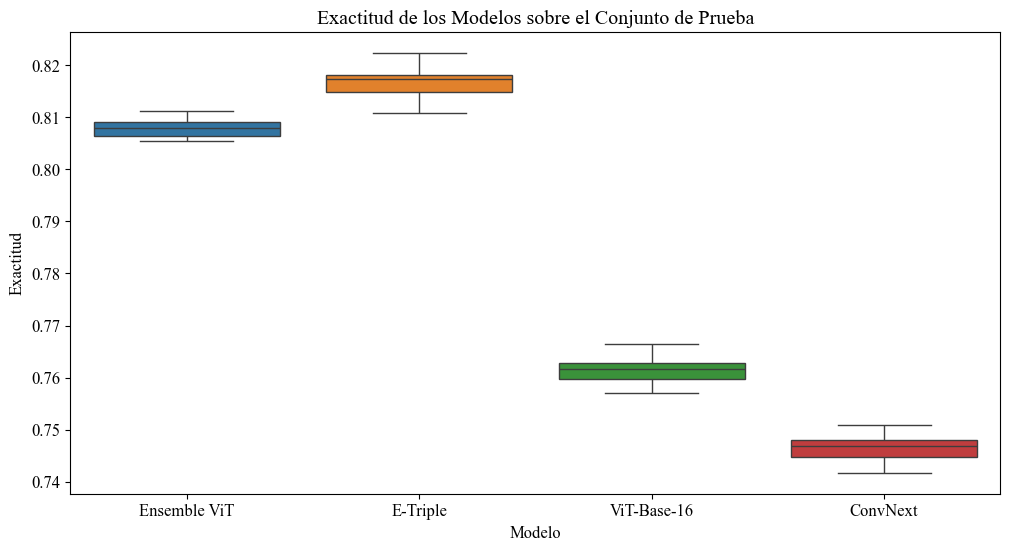

In [8]:
plt.figure(figsize=figsize)
sns.boxplot(data=all_metrics, x="Modelo", y="test/Accuracy", hue="Modelo")
plt.xlabel("Modelo")
plt.ylabel("Exactitud")
plt.title("Exactitud de los Modelos sobre el Conjunto de Prueba")

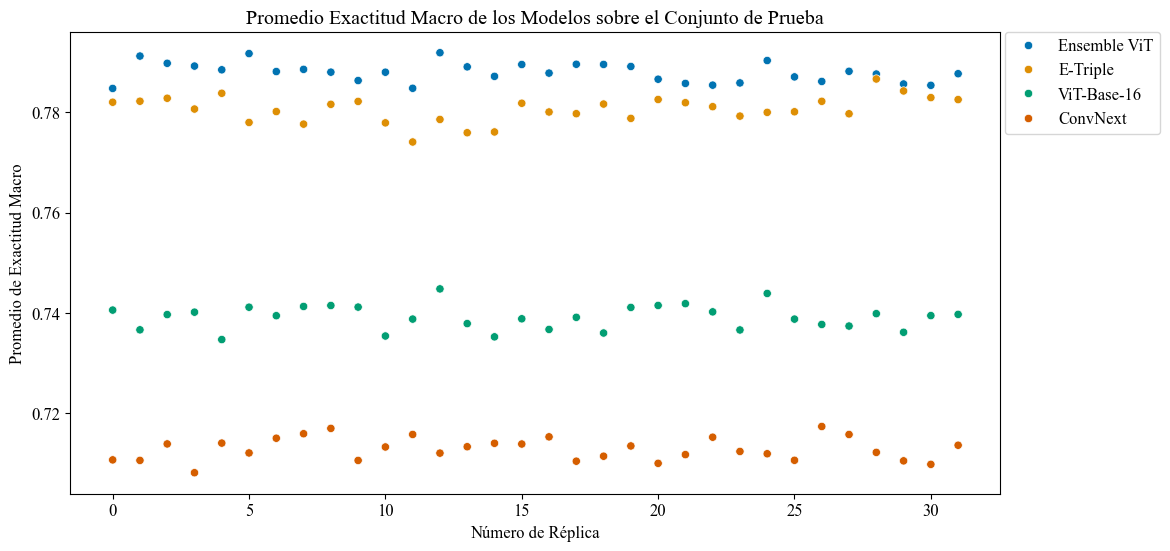

In [9]:
plt.figure(figsize=figsize)
# use a color palette accepted by IEEE
sns.scatterplot(
    data=all_metrics, x=all_metrics.index, y="test/BalancedAccuracy", hue="Modelo", palette="colorblind"
)

plt.xlabel("Número de Réplica")
plt.ylabel("Promedio de Exactitud Macro")
plt.title("Promedio Exactitud Macro de los Modelos sobre el Conjunto de Prueba")
# move the hue legend outside the plot
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0.0)

Text(0.5, 1.0, 'Exactitud de los Modelos sobre el Conjunto de Prueba')

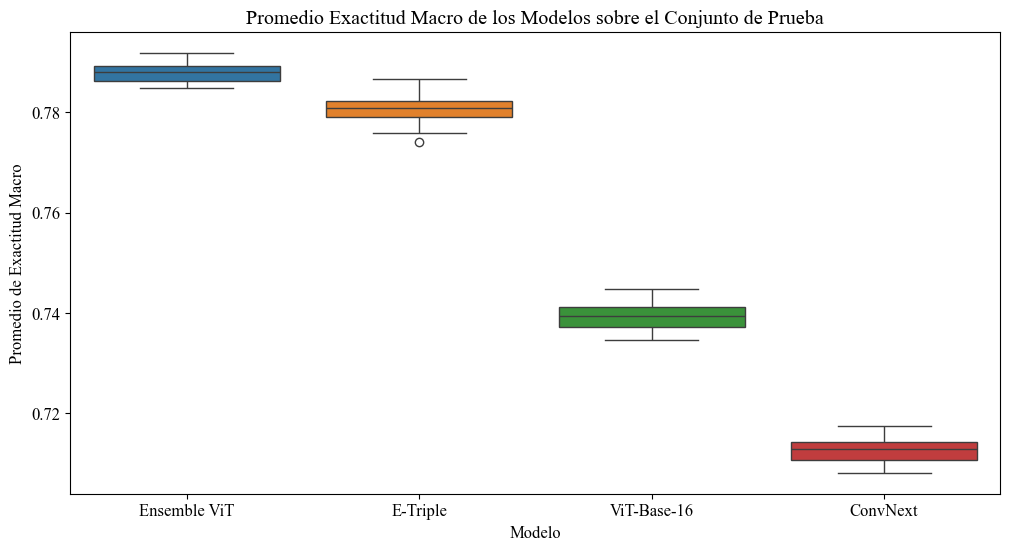

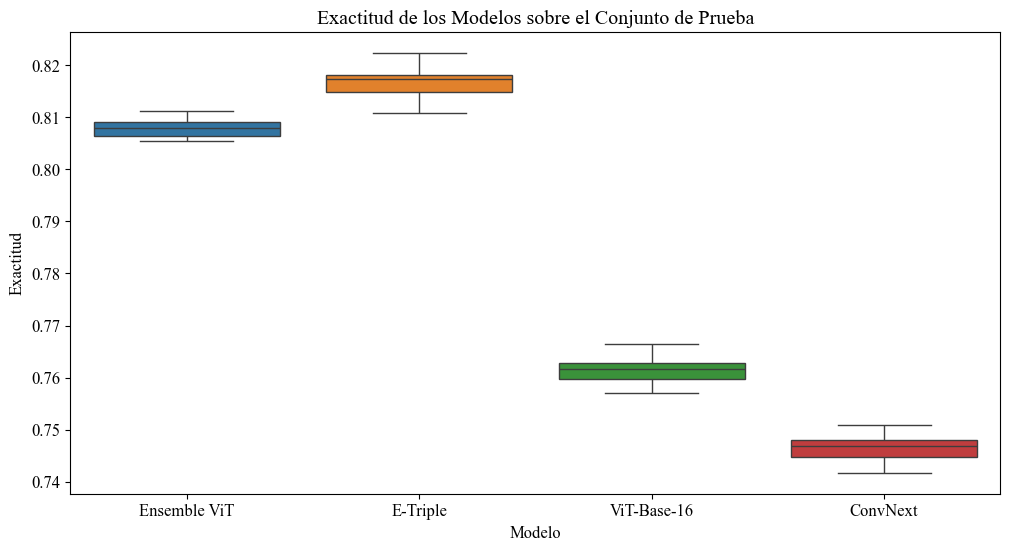

In [10]:
plt.figure(figsize=figsize)
sns.boxplot(data=all_metrics, x="Modelo", y="test/BalancedAccuracy", hue="Modelo")
plt.xlabel("Modelo")
plt.ylabel("Promedio de Exactitud Macro")
plt.title("Promedio Exactitud Macro de los Modelos sobre el Conjunto de Prueba")
plt.figure(figsize=figsize)
sns.boxplot(data=all_metrics, x="Modelo", y="test/Accuracy", hue="Modelo")
plt.xlabel("Modelo")
plt.ylabel("Exactitud")
plt.title("Exactitud de los Modelos sobre el Conjunto de Prueba")

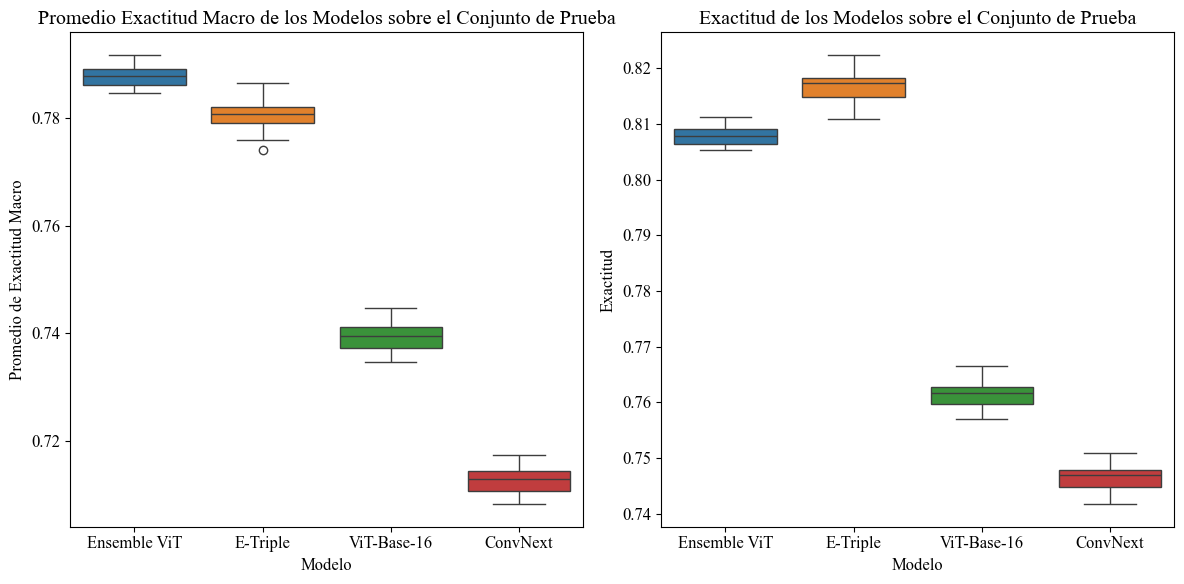

In [11]:
fig, axs = plt.subplots(1, 2, figsize=figsize)

sns.boxplot(data=all_metrics, x="Modelo", y="test/BalancedAccuracy", hue="Modelo", ax=axs[0])
axs[0].set_xlabel("Modelo")
axs[0].set_ylabel("Promedio de Exactitud Macro")
axs[0].set_title("Promedio Exactitud Macro de los Modelos sobre el Conjunto de Prueba")

sns.boxplot(data=all_metrics, x="Modelo", y="test/Accuracy", hue="Modelo", ax=axs[1])
axs[1].set_xlabel("Modelo")
axs[1].set_ylabel("Exactitud")
axs[1].set_title("Exactitud de los Modelos sobre el Conjunto de Prueba")

plt.tight_layout()

# Statistical Testing for the Mean of a Normal Distribution of the response variable

Text(0, 0.5, 'Valores Ordenados')

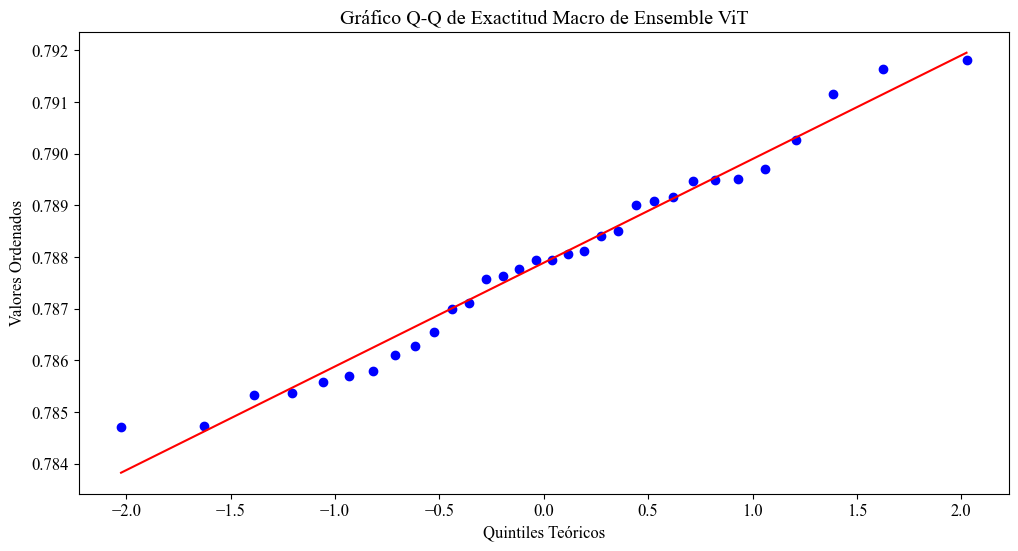

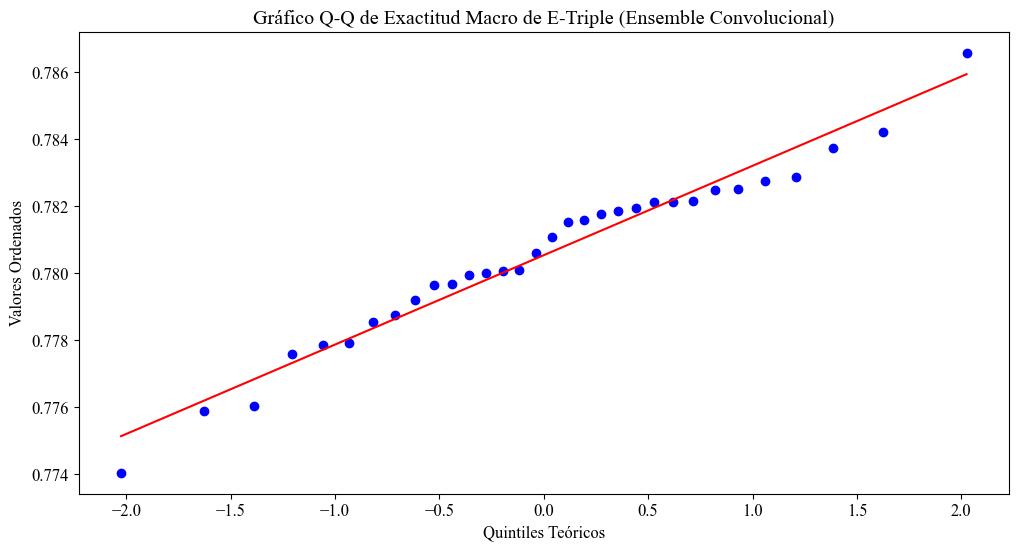

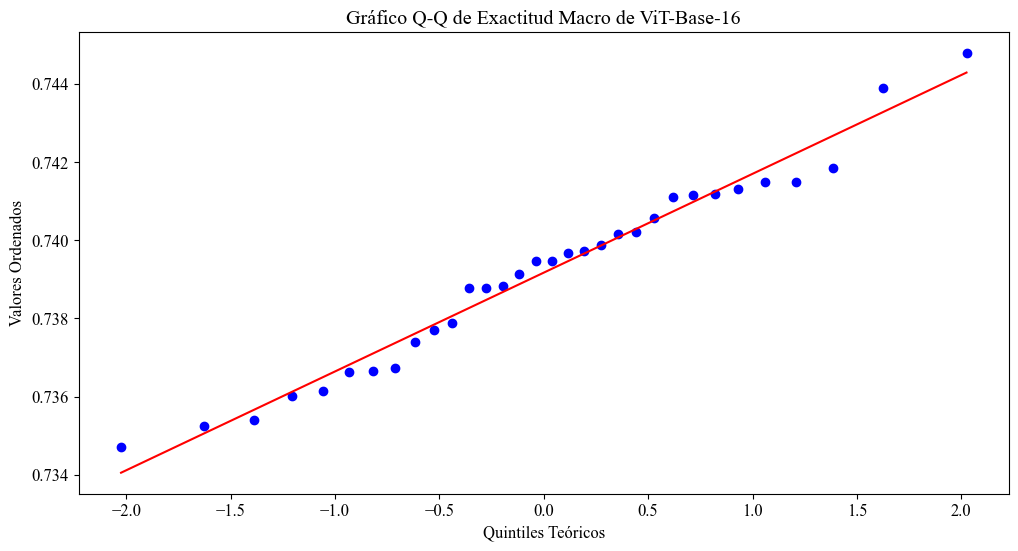

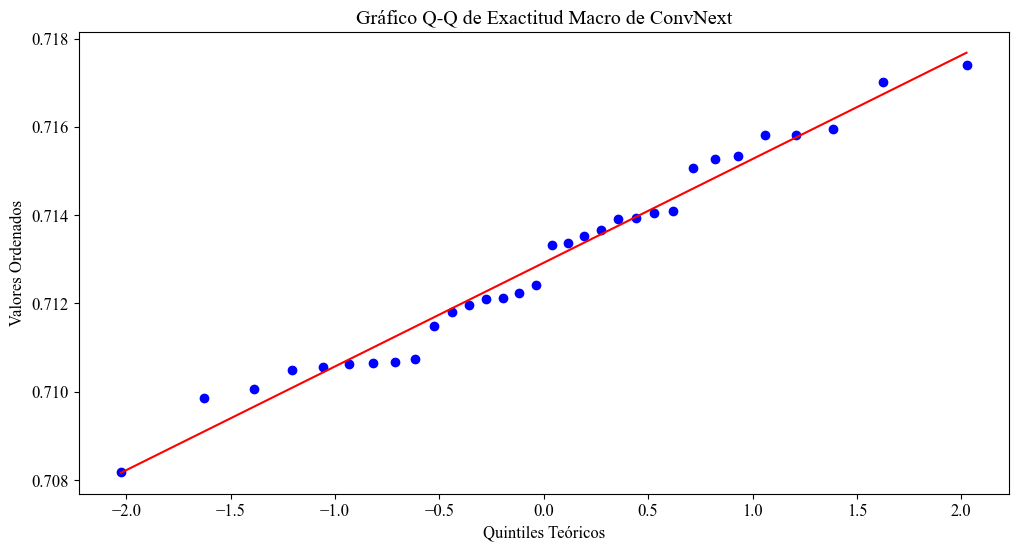

In [12]:
import scipy.stats as stats

alpha = 0.05
# we use the qq plots to check if data is normally distributed

plt.figure(figsize=figsize)
stats.probplot(vit_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Exactitud Macro de Ensemble ViT")
plt.xlabel("Quintiles Teóricos")
plt.ylabel("Valores Ordenados")


plt.figure(figsize=figsize)
stats.probplot(conv_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Exactitud Macro de E-Triple (Ensemble Convolucional)")
plt.xlabel("Quintiles Teóricos")
plt.ylabel("Valores Ordenados")


plt.figure(figsize=figsize)
stats.probplot(vit_base_16["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Exactitud Macro de ViT-Base-16")
plt.xlabel("Quintiles Teóricos")
plt.ylabel("Valores Ordenados")

plt.figure(figsize=figsize)
stats.probplot(convnext["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Gráfico Q-Q de Exactitud Macro de ConvNext")
plt.xlabel("Quintiles Teóricos")
plt.ylabel("Valores Ordenados")

## Normality Assumption using the Shapiro-Wilk Test

In [13]:
def check_normality(df: pd.DataFrame, name: str):
    print(f"-Checking normality for {name} using Shapiro-Wilk Tests- alpha {alpha}")
    shapiro_stat, shapiro_p = stats.shapiro(df["test/BalancedAccuracy"])
    print(f"Shapiro Statistic: {shapiro_stat}")
    print(f"Shapiro P Value: {shapiro_p}")
    print()
    if shapiro_p < alpha:
        print(f"The data {name} is not normally distributed")
    else:
        print(f"The data {name} is normally distributed")
    print()
    return shapiro_stat, shapiro_p


shapiros = {}
shapiros["Ensemble ViT"] = check_normality(vit_ensemble, "Ensemble ViT")
shapiros["E-Triple (Ensemble Convolucional)"] = check_normality(conv_ensemble, "E-Triple (Ensemble Convolucional)")
shapiros["ViT-Base-16"] = check_normality(vit_base_16, "ViT-Base-16")
shapiros["ConvNext"] = check_normality(convnext, "ConvNext")
shapiros = pd.DataFrame(shapiros, index=["shapiro_stat", "shapiro_p"]).T
shapiros.rename(columns={"shapiro_stat": "Estadístico de Shapiro-Wilk", "shapiro_p": "Valor P Shapiro-Wilk"}, inplace=True)
shapiros

-Checking normality for Ensemble ViT using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.9689071397528256
Shapiro P Value: 0.4697932027492762

The data Ensemble ViT is normally distributed

-Checking normality for E-Triple (Ensemble Convolucional) using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.975314236988187
Shapiro P Value: 0.6566168728405842

The data E-Triple (Ensemble Convolucional) is normally distributed

-Checking normality for ViT-Base-16 using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.973891761094334
Shapiro P Value: 0.6129215517764093

The data ViT-Base-16 is normally distributed

-Checking normality for ConvNext using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.9731330504521092
Shapiro P Value: 0.5899720814497698

The data ConvNext is normally distributed



,Estadístico de Shapiro-Wilk,Valor P Shapiro-Wilk
Ensemble ViT,0.968907,0.469793
E-Triple (Ensemble Convolucional),0.975314,0.656617
ViT-Base-16,0.973892,0.612922
ConvNext,0.973133,0.589972


In [14]:
import numpy as np

shapiros_residuals = {}

for model, values in {"Ensemble ViT": vit_ensemble, "E-Triple (Ensemble Convolucional)": conv_ensemble, "ViT-Base-16": vit_base_16, "ConvNext": convnext}.items():
    residuals = values - np.mean(values)
    shapiros_residuals[model] = check_normality(residuals, model)

shapiros_residuals = pd.DataFrame(shapiros_residuals, index=["shapiro_stat", "shapiro_p"]).T
shapiros_residuals.rename(columns={"shapiro_stat": "Estadístico de Shapiro-Wilk", "shapiro_p": "Valor P Shapiro-Wilk"}, inplace=True)
shapiros_residuals

-Checking normality for Ensemble ViT using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.9689071397528256
Shapiro P Value: 0.4697932027492762

The data Ensemble ViT is normally distributed

-Checking normality for E-Triple (Ensemble Convolucional) using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.975314236988187
Shapiro P Value: 0.6566168728405842

The data E-Triple (Ensemble Convolucional) is normally distributed

-Checking normality for ViT-Base-16 using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.973891761094334
Shapiro P Value: 0.6129215517764093

The data ViT-Base-16 is normally distributed

-Checking normality for ConvNext using Shapiro-Wilk Tests- alpha 0.05
Shapiro Statistic: 0.9731330504521092
Shapiro P Value: 0.5899720814497698

The data ConvNext is normally distributed



,Estadístico de Shapiro-Wilk,Valor P Shapiro-Wilk
Ensemble ViT,0.968907,0.469793
E-Triple (Ensemble Convolucional),0.975314,0.656617
ViT-Base-16,0.973892,0.612922
ConvNext,0.973133,0.589972


## Levene Test for Homogeneity of Variance

In [15]:
# Levene test is for equal variances
levene_stat, levene_p = stats.levene(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
    convnext["test/BalancedAccuracy"],
)
print(f'-Levene Test- alpha {alpha}')
print(f"Levene Stat: {levene_stat}")
print(f"Levene p-value: {levene_p}")
if levene_p < alpha:
    print("The variances are not equal")
    can_make_anova = False
else:
    print("The variances are equal")

-Levene Test- alpha 0.05
Levene Stat: 0.7421072296634833
Levene p-value: 0.5289162643469387
The variances are equal


## ANOVA Test for the Mean of a Normal Distribution

In [16]:
# ANOVA test
fvalue, pvalue = stats.f_oneway(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
    convnext["test/BalancedAccuracy"],
)

print(f"-ANOVA Test- alpha {alpha}")
print(f"F Statistic: {fvalue}")
print(f"P Value: {pvalue}")
if pvalue < alpha:
    print("Reject the null hypothesis, the means are not equal")
    print(
        "There is a significant difference between the models in terms of balanced accuracy"
    )
else:
    print("Fail to reject the null hypothesis, the means are equal")
    print(
        "There is no significant difference between the models in terms of balanced accuracy"
    )

-ANOVA Test- alpha 0.05
F Statistic: 7292.09223023743
P Value: 3.24829482089646e-139
Reject the null hypothesis, the means are not equal
There is a significant difference between the models in terms of balanced accuracy


## Tukey's HSD Test for Multiple Comparisons

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# we can use Tukey's HSD test to find out which models are different

# the tukeyhsd test performs multiple pairwise comparisons using the studentized range distribution with

m_comp = pairwise_tukeyhsd(
    all_metrics["test/BalancedAccuracy"], all_metrics["Modelo"], alpha=alpha / 3
)

print(m_comp)


      Multiple Comparison of Means - Tukey HSD, FWER=0.02      
   group1       group2    meandiff p-adj  lower   upper  reject
---------------------------------------------------------------
    ConvNext     E-Triple   0.0676   0.0  0.0659  0.0694   True
    ConvNext Ensemble ViT    0.075   0.0  0.0732  0.0767   True
    ConvNext  ViT-Base-16   0.0262   0.0  0.0245   0.028   True
    E-Triple Ensemble ViT   0.0074   0.0  0.0056  0.0091   True
    E-Triple  ViT-Base-16  -0.0414   0.0 -0.0431 -0.0396   True
Ensemble ViT  ViT-Base-16  -0.0487   0.0 -0.0505  -0.047   True
---------------------------------------------------------------
